In [0]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
%cd drive/My\ Drive/clean-data/train_jpg

/content/drive/My Drive/clean-data/train_jpg


In [0]:
%ls

get_imports.py  __pycache__/  requirements.txt  train_jpg/


In [0]:
!pip install -r requirements.txt

In [0]:
from get_imports import *

In [0]:
trn_dir = 'train_jpg/'

In [0]:
def show_batch(x, nrows = 5, ncols = 5, title = None):
    """
    Read a list of images, and display them
    """
    fig=plt.figure(figsize=(9, 9))
    if title: plt.title(title)
    for i in range(1, ncols*nrows +1):
        ds = x[i]
        fig.add_subplot(nrows, ncols, i)
        plt.imshow(ds, cmap=plt.cm.bone)
        fig.add_subplot

In [0]:
trn_files = glob.glob(trn_dir + '*.jpg')
len(trn_files)

9088

In [0]:
def open_image(f): return np.array(Image.open(f).convert('L'))   

In [0]:
def open_imgs(imgs): return np.array([open_image(x) for x in imgs])

In [0]:
%%time
trn_imgs = open_imgs(trn_files[:200])
# trn_imgs = np.array([open_image(x) for x in trn_files[:200]])
np.random.shuffle(trn_imgs)
# assert len(trn_files) == len(trn_imgs), "Couldn't open all imgs"

CPU times: user 299 ms, sys: 34.6 ms, total: 333 ms
Wall time: 592 ms


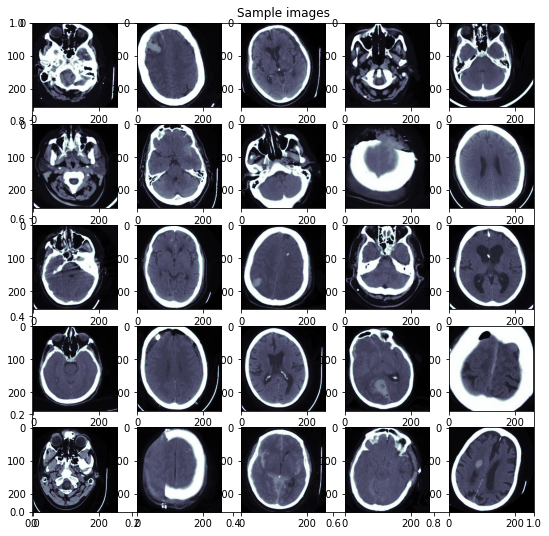

In [0]:
show_batch(trn_imgs, 5,5,"Sample images")

In [0]:
lbls = pd.read_csv('../meta/meta/only_labels.csv')
lbls.head()

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0


In [0]:
lbls.isna().sum()

ID       0
Label    0
dtype: int64

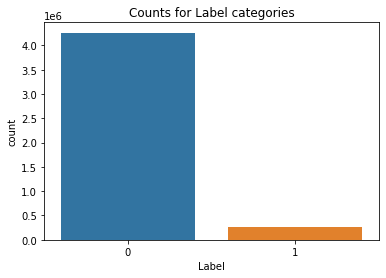

In [0]:
sns.countplot(lbls['Label'])
plt.title("Counts for Label categories");

The labels are clearly imbalanced as we can expect from any medical application. Most cases will not show hemorrhage but, we care more about identifying the images which show the bleed.

In [0]:
lbls['types'] = lbls['ID'].str.split("_",n=3,expand = True)[2]
lbls.head()

,ID,Label,types
0,ID_12cadc6af_epidural,0,epidural
1,ID_12cadc6af_intraparenchymal,0,intraparenchymal
2,ID_12cadc6af_intraventricular,0,intraventricular
3,ID_12cadc6af_subarachnoid,0,subarachnoid
4,ID_12cadc6af_subdural,0,subdural


In [0]:
groups = lbls.groupby('types').sum()
groups.head()

,Label
types,
any,107933
epidural,3145
intraparenchymal,36118
intraventricular,26205
subarachnoid,35675


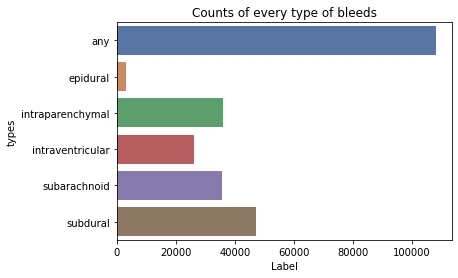

In [0]:
plt.title("Counts of every type of bleeds")
sns.barplot(y=groups.index, x=groups.Label, palette="deep");

This plot shows counts of types of bleeds. The "any" category signifies that there are more than one bleed is present. The type of a bleed is determined by it's location in the brain. It is very common for a bleed to spread into neighbouring parts of the brain. The MRI is not just one picture but, consists of slices of the brain from top to bottom. When we take a look at the full MRI we notice that the bleed will be seen in multiple slices and not just one. Which helps to understand why most bleeds are of type "any". 

In [0]:
df = pd.read_feather('../meta/meta/labels.fth')
df.head()

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0,0,0,0,0,0,0
1,ID_00005679d,0,0,0,0,0,0
2,ID_00008ce3c,0,0,0,0,0,0
3,ID_0000950d7,0,0,0,0,0,0
4,ID_0000aee4b,0,0,0,0,0,0


In [0]:
btypes = list(groups.index); btypes

['any',
 'epidural',
 'intraparenchymal',
 'intraventricular',
 'subarachnoid',
 'subdural']

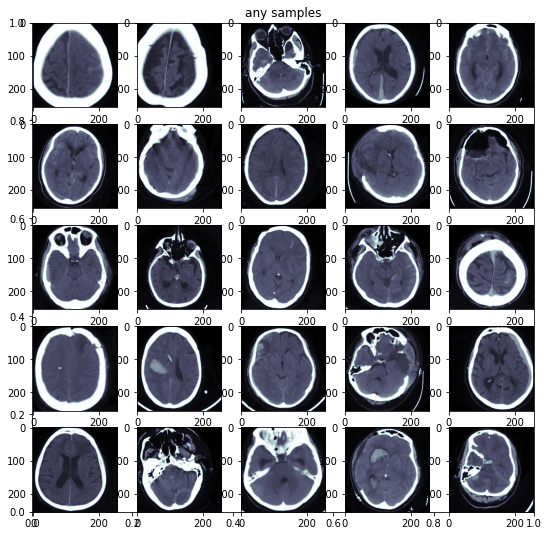

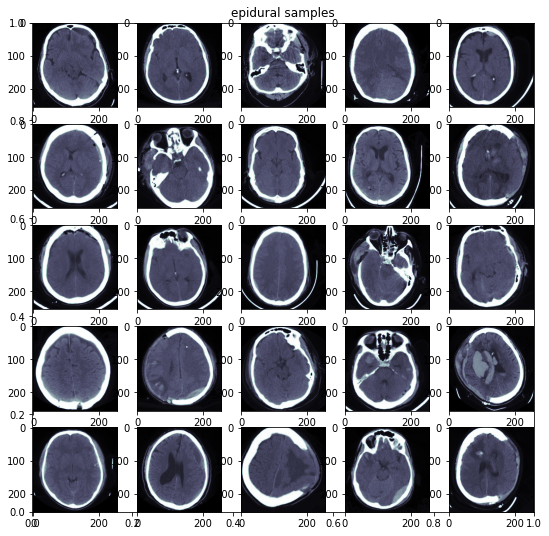

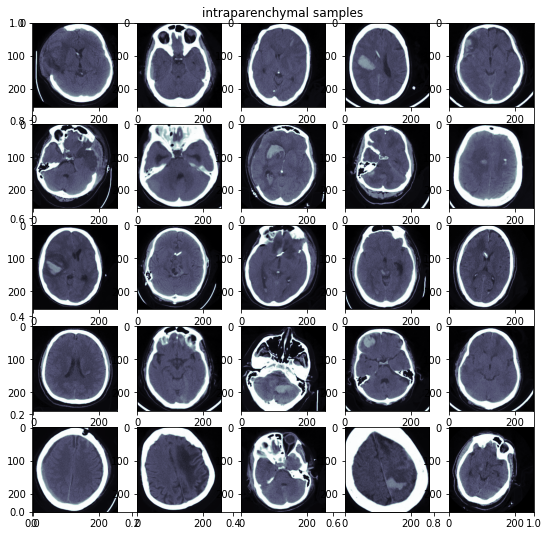

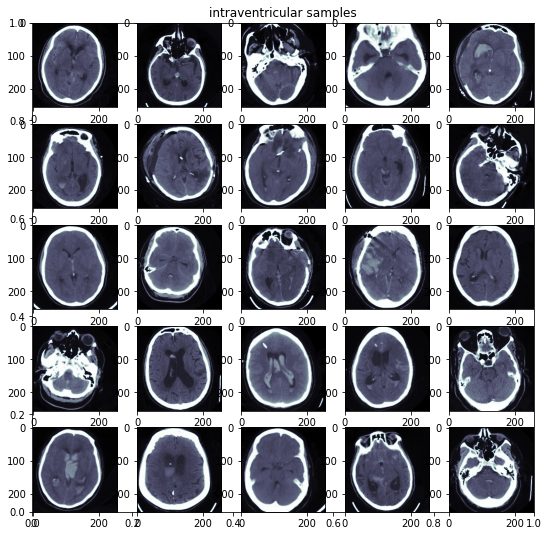

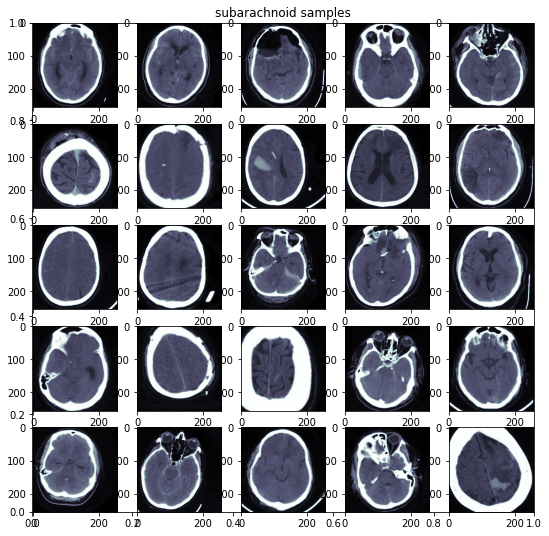

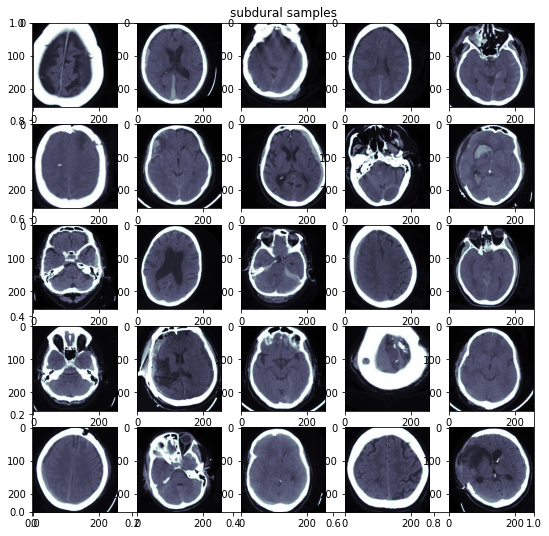

In [0]:
for typ in btypes:
    tids = list(df[df[typ]==1]['ID'])[:30]
    tids = ["train_jpg/"+i+".jpg" for i in tids]
    tims = open_imgs(tids)
    show_batch(tims,5,5,typ + " samples")
    print("\n")

In [0]:
trn = pd.read_feather('../meta/meta/df_trn.fth')
trn.head().T

,0,1,2,3,4
BitsAllocated,16,16,16,16,16
BitsStored,16,12,16,16,12
Columns,512,512,512,512,512
HighBit,15,11,15,15,11
ImageOrientationPatient,1,1,1,1,1
ImageOrientationPatient1,0,0,0,0,0
ImageOrientationPatient2,0,0,0,0,0
ImageOrientationPatient3,0,0,0,0,0
ImageOrientationPatient4,0.927184,1,1,0.927184,1
ImageOrientationPatient5,-0.374607,0,0,-0.374607,0


Width of a given slice (image) in centimeters

In [0]:
round(np.min(trn['PixelSpacing1'] * trn['Rows']) / 10, 2), round(np.max(trn['PixelSpacing1'] * trn['Rows']) / 10,2)

(15.0, 50.0)